<a href="https://colab.research.google.com/github/ernestomancebo/DeepLearningInPractice/blob/main/text_and_sequences/rnn_lstm_movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Basic RNN vs. LSTM for text analysis

This notebook implements two recurrent networks: a basic `RNN` and a `LSTM` which is a variant that contains a *forget gate*.

A Recurrent Neural Network (`RNN`) is great for sequence of data (such as text) because it holds a state that means a context for such secuence. The basic RNN implementation hides a flawn which is that for long sequences it might lead to a Gradient Vanishing, this is when the activation function can't infer and start bypassing the output. This problem is solved by the `LSTM` (Long Short Term Memory) which implements a forget gate, meaning this that it drops certain data that no longer matters, similar to a `Dropout` layer/filter in a `ConvNet`.

##Basic RNN implementation

Here we start implementing a basic RNN using Keras for classifying movies reviews

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10_000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(f'train sequences: {len(input_train)}')
print(f'test sequences: {len(input_test)}')

# Padding sequences
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print(f'train shape: {input_train.shape}')
print(f'test shape: {input_test.shape}')

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

train sequences: 25000
test sequences: 25000
train shape: (25000, 500)
test shape: (25000, 500)


In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [4]:
%%capture

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

# Train the model
history = model.fit(
    input_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

In [5]:
import matplotlib.pyplot as plt

def plot_history(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

###Training History

Let's see who it did.

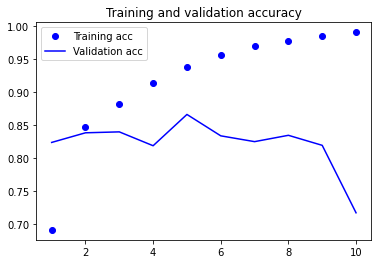

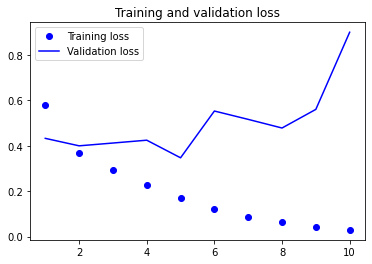

In [8]:
plot_history(history)

##LSTM to improve vanishing-gradient

Now we're solving the same problem using a `LSTM` layer, as said before, this one would solve the vanishing-gradient problem and might retaing a better context of the sequences

In [6]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
%%capture

history = model.fit(
    input_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

###Plot History

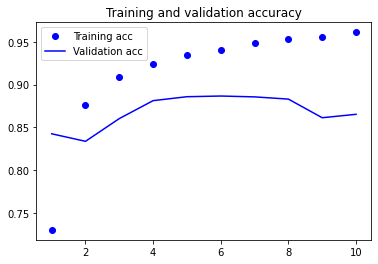

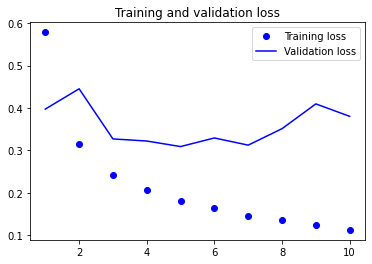

In [11]:
plot_history(history)